# Concatenation of .csv files

---

**Updated on:** 2023-09-15

> Authors: Simon Knoblauch (simon.knoblauch@student.uni-tuebingen.de)  
> Input file(s): folder of .csv files to be concatenated  
> Output file(s): concatenated .csv file  
> Dependencies: pandas, pathlib, matplotlib, numpy, ipympl, sys

**Please read the comments before proceeding to run the code and let us know if you run into any errors or find undocumented pieces of code.**

## Importing Dependencies

In [17]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import ipympl
import sys
sys.path.append(r"..")
import microspot_util as msu
import microspot_util.plots as plots
%matplotlib widget

## User Input

In [18]:
# Input Folder containing all .csv spot files with the ending "spotlist.csv".
input_folder=Path(r"../output")

# Folder that the output should be saved to.
output_folder=Path(r"../output")

RT_start=0               # RT @ which spotting was started
RT_end=1                 # RT @ which spotting was stopped


## Data Merging and RT Matching

In [19]:
# Loop over all files in the folder that should be concatenated.
merged_spots=[]
for file in input_folder.glob("*spotlist.csv"):
    # Create list of spot-objects from .csv
    current_list=msu.spot.df_to_list(pd.read_csv(file))
    # Add to merged spot-list
    merged_spots.extend(current_list)

# Sort the newly merged spot-list by rows and columns. If serpentine = True, even rows are sorted descendingly.
msu.spot.sort_list(merged_spots,serpentine=True,inplace=True)

# Annotates each spot with a retention time based on the input parameters.
msu.spot.annotate_RT(merged_spots,RT_start,RT_end)

## Heatmap of concatenated spotlist

,row,row_name,column,type,x_coord,y_coord,radius,halo,spot_intensity,norm_intensity,note,RT
0,2,B,1,Sample,93,46,23,NaN,0.560014,0.982770,Initial Detection,0.059561
1,2,B,2,Sample,199,47,23,NaN,0.577184,1.012902,Initial Detection,0.056426
2,2,B,3,Sample,303,40,25,NaN,0.573282,1.006055,Backfilled,0.053292
3,2,B,4,Sample,411,48,24,NaN,0.580311,1.018390,Initial Detection,0.050157
4,2,B,5,Sample,519,47,24,NaN,0.584947,1.026526,Initial Detection,0.047022
...,...,...,...,...,...,...,...,...,...,...,...,...
315,17,Q,16,Sample,1684,1869,25,NaN,0.590676,1.036579,Initial Detection,0.987461
316,17,Q,17,Sample,1793,1869,25,NaN,0.593319,1.041217,Initial Detection,0.990596
317,17,Q,18,Sample,1900,1869,24,NaN,0.592694,1.040121,Initial Detection,0.993730
318,17,Q,19,Sample,2014,1868,20,NaN,0.595338,1.044761,Initial Detection,0.996865


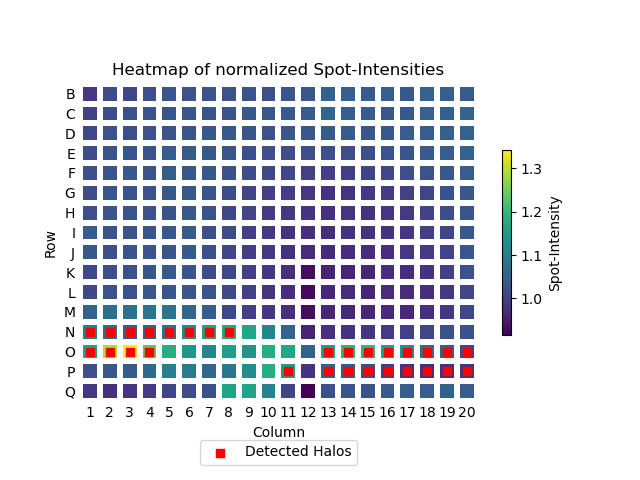

In [32]:
msu.spot.sort_list(merged_spots,serpentine=False,inplace=True)
# Create df from list
concat_df=msu.spot.create_df(merged_spots)

# Extract information on first and last spot
first_spot=merged_spots[0].row_name+str(merged_spots[0].col)
last_spot=merged_spots[-1].row_name+str(merged_spots[-1].col)

# Dictionaries to convert Row-Letters into Row-Numbers and vice versa.
row_conv={"abcdefghijklmnopqrstuvwxyz"[i-1]: i for i in range(1,27)}
row_conv_inv={v:k for k,v in row_conv.items()}

# Get the grid-properties of the spotlist.
grid_props=msu.conv_gridinfo(first_spot,last_spot,row_conv)

# Plot the heatmap of the merged data, uses normalized data if norm_data is set to True.
fig1,ax1=plt.subplots()
plots.plot_heatmap(fig1,ax1,concat_df,grid_props,norm_data=True)
concat_df

## Chromatogram

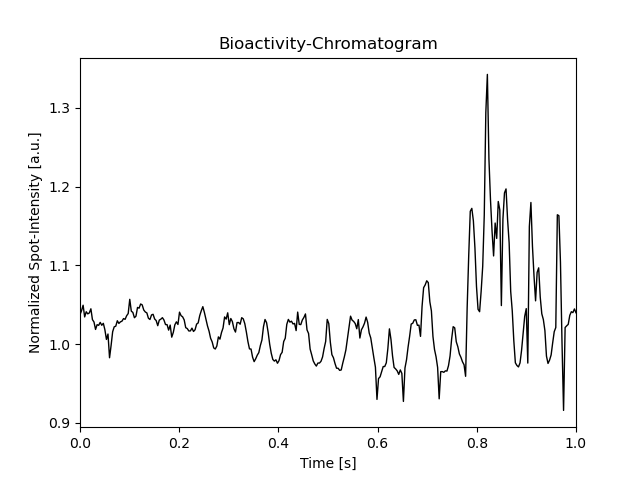

In [21]:
# Plot the chromatogram, uses normalized data if norm_data is set to True.
fig,ax=plt.subplots()
plots.plot_chromatogram(fig,ax,concat_df,norm_data=True)

## Save output-files.

In [22]:
# Write to file.
output_filename=output_folder / Path(input_folder.name+"_concat.csv")
concat_df.to_csv(output_filename)